# Ultimate Guitar Scrape - 5
## Map and Graphing
*Take full data and add country geometry, then does some exploratory analysis*

----

**Final Project for Data & Databases**

**C.J. Robinson**

**Fall 2024**

-----
### Scrape song pages

In [2]:
import re
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
from playwright.async_api import async_playwright
import numpy as np

In [77]:
df = pd.read_csv("top_songs_full.csv")
df.head()

,rank,artist,artist_list,song,ratings,hits,type,song_link,artist_link,star_count,...,id,person_group,gender,country,start_date,tags,favorites,song_no_vers,version,capo
0,1,Ed Sheeran,['Ed Sheeran'],Perfect,48238.0,41205313,chords,https://tabs.ultimate-guitar.com/tab/ed-sheera...,https://www.ultimate-guitar.com/artist/ed_shee...,5.0,...,b8a7c51f-362c-4dcb-a259-bc6e0095f0a6,Person,male,GB,1991-02-17,"['pop', 'guitarist', 'folk', 'singer-songwrite...",620778.0,Perfect,1,1.0
1,2,Jeff Buckley,['Jeff Buckley'],Hallelujah (ver 2),54484.0,39807305,chords,https://tabs.ultimate-guitar.com/tab/jeff-buck...,https://www.ultimate-guitar.com/artist/jeff_bu...,5.0,...,e6e879c0-3d56-4f12-b3c5-3ce459661a8e,Person,male,US,1966-11-17,"['rock', 'alternative rock', 'american', 'blue...",502048.0,Hallelujah,2,1.0
2,3,Elvis Presley,['Elvis Presley'],Cant Help Falling In Love,32809.0,33890059,chords,https://tabs.ultimate-guitar.com/tab/elvis-pre...,https://www.ultimate-guitar.com/artist/elvis_p...,5.0,...,01809552-4f87-45b0-afff-2c6f0730a3be,Person,male,US,1935-01-08,"['rock', 'pop', 'american', 'blues', 'singer',...",665632.0,Cant Help Falling In Love,1,2.0
3,4,Passenger,['Passenger'],Let Her Go,24248.0,31904817,chords,https://tabs.ultimate-guitar.com/tab/passenger...,https://www.ultimate-guitar.com/artist/passeng...,5.0,...,186e216a-2f8a-41a1-935f-8e30c018a8fe,Person,male,GB,1984-05-17,"['alternative indy folk', 'alternative rock', ...",631253.0,Let Her Go,1,7.0
4,5,John Legend,['John Legend'],All Of Me,26699.0,29790560,chords,https://tabs.ultimate-guitar.com/tab/john-lege...,https://www.ultimate-guitar.com/artist/john_le...,5.0,...,75a72702-a5ef-4513-bca5-c5b944903546,Person,male,US,1978-12-28,"['american', 'usa', 'soul', 'américain', 'neo ...",474872.0,All Of Me,1,1.0


In [156]:
df['string'] = df["song"] + ": popularity rank " + df["rank"].astype(str) + " / 5000"

In [159]:
output = df.groupby('country')['string'].apply(lambda x: "<div class='movie_list'><h1><b>Top Tabs</b></h1><P>{0}</P></div>".format('</p><p> '.join(x))).reset_index(name='properties.article')
output.head()

,country,properties.article
0,AR,<div class='movie_list'><h1><b>Top Tabs</b></h...
1,AT,<div class='movie_list'><h1><b>Top Tabs</b></h...
2,AU,<div class='movie_list'><h1><b>Top Tabs</b></h...
3,BB,<div class='movie_list'><h1><b>Top Tabs</b></h...
4,BD,<div class='movie_list'><h1><b>Top Tabs</b></h...


In [160]:
songs = df['country'].value_counts().reset_index(name="properties.count")
output = output.merge(songs, how='left', on='country')
output.head()

,country,properties.article,properties.count
0,AR,<div class='movie_list'><h1><b>Top Tabs</b></h...,3
1,AT,<div class='movie_list'><h1><b>Top Tabs</b></h...,1
2,AU,<div class='movie_list'><h1><b>Top Tabs</b></h...,146
3,BB,<div class='movie_list'><h1><b>Top Tabs</b></h...,1
4,BD,<div class='movie_list'><h1><b>Top Tabs</b></h...,2


In [161]:
def assign_color(count):
    if count < 10:
        return "##C2C0A6"
    if count < 50:
        return "#A8B545"
    if count < 100:
        return "#6A8C69"
    else:
        return "#53736A"


output['properties.color'] = output['properties.count'].apply(lambda x: assign_color(x))
output

,country,properties.article,properties.count,properties.color
0,AR,<div class='movie_list'><h1><b>Top Tabs</b></h...,3,##C2C0A6
1,AT,<div class='movie_list'><h1><b>Top Tabs</b></h...,1,##C2C0A6
2,AU,<div class='movie_list'><h1><b>Top Tabs</b></h...,146,#53736A
3,BB,<div class='movie_list'><h1><b>Top Tabs</b></h...,1,##C2C0A6
4,BD,<div class='movie_list'><h1><b>Top Tabs</b></h...,2,##C2C0A6
5,BE,<div class='movie_list'><h1><b>Top Tabs</b></h...,5,##C2C0A6
6,BR,<div class='movie_list'><h1><b>Top Tabs</b></h...,3,##C2C0A6
7,CA,<div class='movie_list'><h1><b>Top Tabs</b></h...,226,#53736A
8,CH,<div class='movie_list'><h1><b>Top Tabs</b></h...,3,##C2C0A6
9,CO,<div class='movie_list'><h1><b>Top Tabs</b></h...,1,##C2C0A6


In [164]:
import json
from pandas import json_normalize
with open('data/custom.geo.json') as json_data:
    geometry_data = json.load(json_data)

In [165]:
df_geo = pd.DataFrame.from_dict(json_normalize(geometry_data['features']), orient='columns')

In [166]:
df_geo.head()

,type,properties.featurecla,properties.scalerank,properties.labelrank,properties.sovereignt,properties.sov_a3,properties.adm0_dif,properties.level,properties.type,properties.tlc,...,properties.fclass_pl,properties.fclass_gr,properties.fclass_it,properties.fclass_nl,properties.fclass_se,properties.fclass_bd,properties.fclass_ua,properties.filename,geometry.type,geometry.coordinates
0,Feature,Admin-0 country,1,5,Costa Rica,CRI,0,2,Sovereign country,1,...,None,None,None,None,None,None,None,CRI.geojson,Polygon,"[[[-82.54619625520348, 9.566134751824677], [-8..."
1,Feature,Admin-0 country,1,5,Nicaragua,NIC,0,2,Sovereign country,1,...,None,None,None,None,None,None,None,NIC.geojson,Polygon,"[[[-83.65561174186158, 10.938764146361422], [-..."
2,Feature,Admin-0 country,1,5,Haiti,HTI,0,2,Sovereign country,1,...,None,None,None,None,None,None,None,HTI.geojson,Polygon,"[[[-71.71236141629296, 19.714455878167357], [-..."
3,Feature,Admin-0 country,1,5,Dominican Republic,DOM,0,2,Sovereign country,1,...,None,None,None,None,None,None,None,DOM.geojson,Polygon,"[[[-71.70830481635805, 18.044997056546094], [-..."
4,Feature,Admin-0 country,1,6,El Salvador,SLV,0,2,Sovereign country,1,...,None,None,None,None,None,None,None,SLV.geojson,Polygon,"[[[-89.35332597528281, 14.424132798719086], [-..."


In [167]:
df_final = pd.merge(
    output,
    df_geo[["properties.iso_a2","geometry.coordinates","geometry.type"]],
    left_on='country', 
    right_on = 'properties.iso_a2', how='left')

In [168]:
df_final.head()

,country,properties.article,properties.count,properties.color,properties.iso_a2,geometry.coordinates,geometry.type
0,AR,<div class='movie_list'><h1><b>Top Tabs</b></h...,3,##C2C0A6,AR,"[[[[-68.63401022758323, -52.63637045887449], [...",MultiPolygon
1,AT,<div class='movie_list'><h1><b>Top Tabs</b></h...,1,##C2C0A6,AT,"[[[16.979666782304037, 48.123497015976305], [1...",Polygon
2,AU,<div class='movie_list'><h1><b>Top Tabs</b></h...,146,#53736A,AU,"[[[[147.68925947488418, -40.808258152022674], ...",MultiPolygon
3,BB,<div class='movie_list'><h1><b>Top Tabs</b></h...,1,##C2C0A6,NaN,NaN,NaN
4,BD,<div class='movie_list'><h1><b>Top Tabs</b></h...,2,##C2C0A6,BD,"[[[92.67272098182556, 22.041238918541254], [92...",Polygon


In [173]:
df_final = df_final.rename(columns={'country': 'properties.name'})
df_final.head()

df_final = df_final[df_final['geometry.coordinates'].notnull()]
df_final['properties.headline'] =  output['properties.count'].astype(str) + np.where(output["properties.count"]>1, ' top tabs', ' top tab')

In [174]:
ok_json = json.loads(df_final.to_json(orient='records'))

In [175]:
def process_to_geojson(file):
    geo_data = {"type": "FeatureCollection", "features":[]}
    for row in file:
        this_dict = {"type": "Feature", "properties":{}, "geometry": {}}
        for key, value in row.items():
            key_names = key.split('.')
            if key_names[0] == 'geometry':
                this_dict['geometry'][key_names[1]] = value
            if str(key_names[0]) == 'properties':
                this_dict['properties'][key_names[1]] = value
        geo_data['features'].append(this_dict)
    return geo_data

In [176]:
geo_format = process_to_geojson(ok_json)

In [177]:
#Variable name
with open('map_templates/map_shapes_template_proj/geo-data.js', 'w') as outfile:
    outfile.write("const infoData = ")
#geojson output
with open('map_templates/map_shapes_template_proj/geo-data.js', 'a') as outfile:
    json.dump(geo_format, outfile)


In [43]:
%load_ext rpy2.ipython


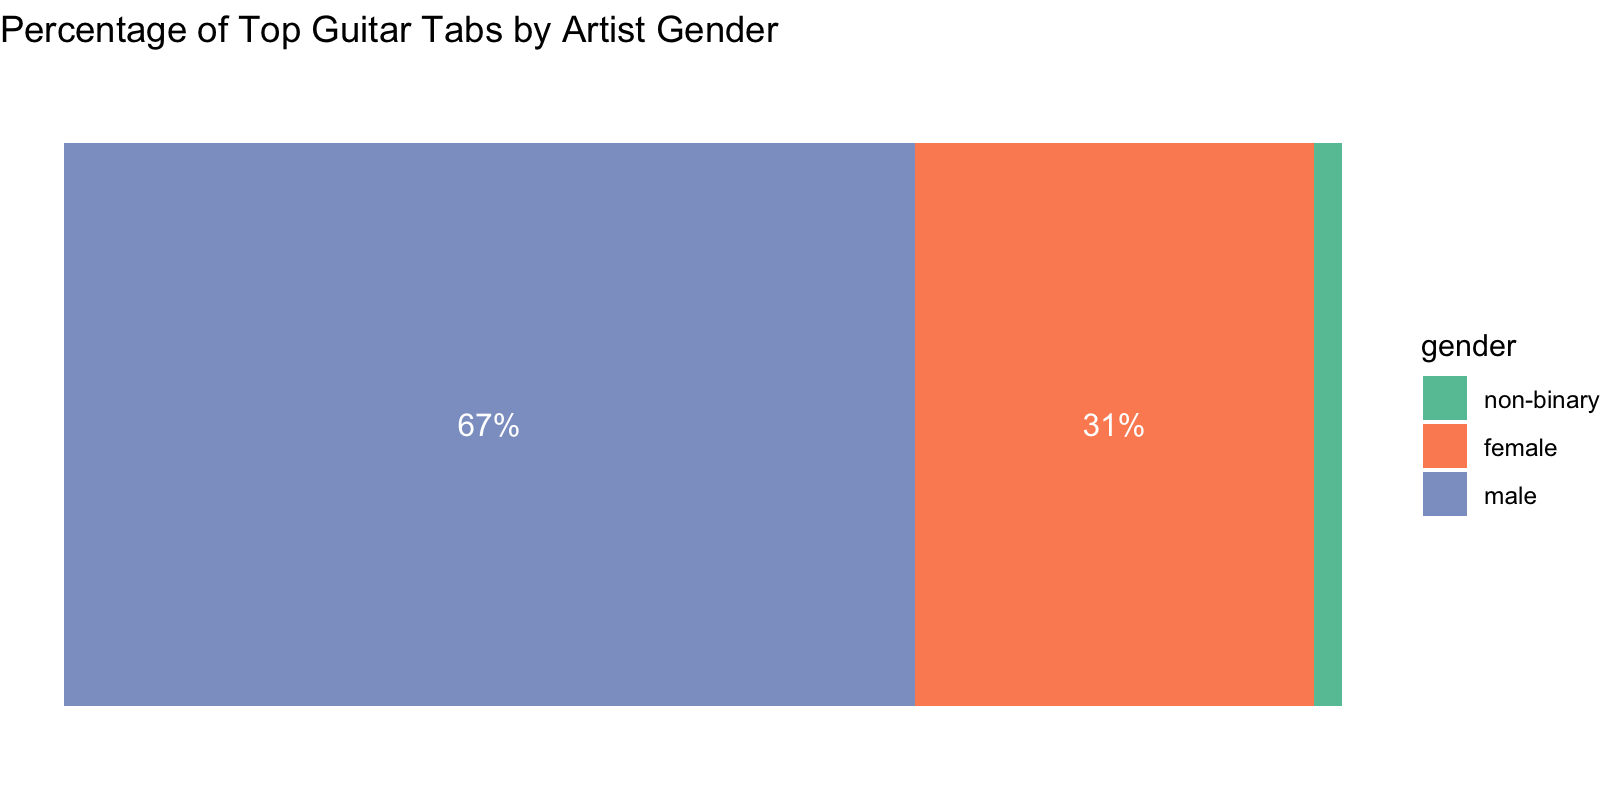

In [102]:
%%R -i df -w 8 -h 4 --units in -r 200
# import df from global environment
# make default figure size 5 by 5 inches with 200 dpi resolution

library(tidyverse)
df %>% 
  filter(!is.na(gender),
        gender != 'not applicable') %>% 
  group_by(gender) %>% 
  summarize(count = n()) %>% 
  arrange(desc(count))%>%
  mutate(percentage = count / sum(count) * 100,
            gender = reorder(gender, count)) %>% 
  ggplot(aes(x = "gender", y = count, fill = gender)) + 
  ggtitle("Percentage of Top Guitar Tabs by Artist Gender") +
  geom_bar(stat = "identity", position = "stack") + 
  geom_text(    aes(label = ifelse(percentage > 5, scales::percent(percentage / 100), "")),  # Show labels only if > 5%

            position = position_stack(vjust = 0.5),
            size = 4,
            color = "white") + 
  scale_fill_brewer(palette = "Set2") +  # Use a softer palette
  coord_flip() +
  theme_void()

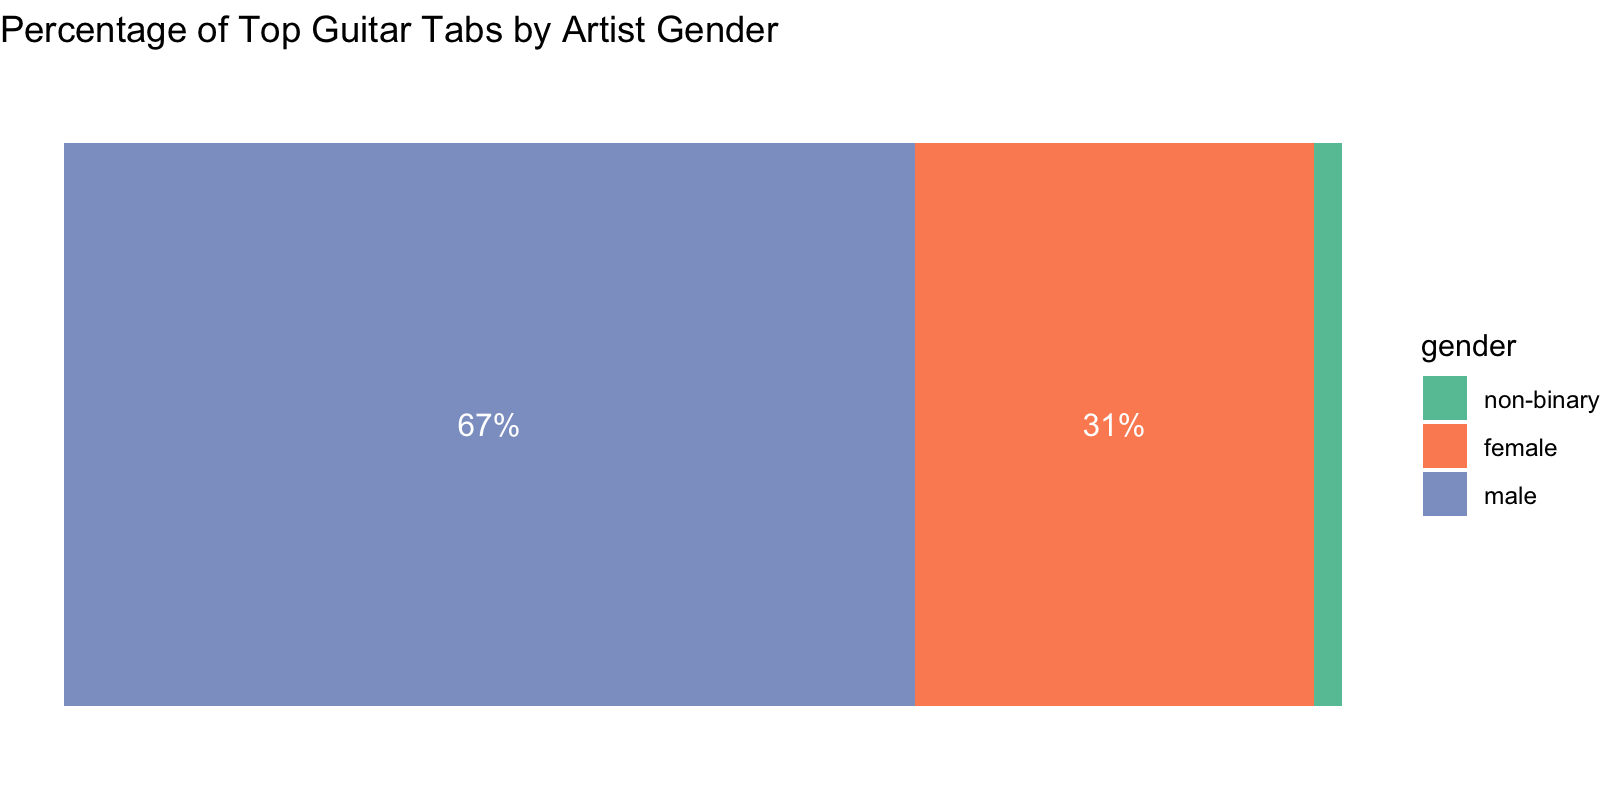

In [144]:
%%R -i df -w 8 -h 4 --units in -r 200
# import df from global environment
# make default figure size 5 by 5 inches with 200 dpi resolution

library(tidyverse)
df %>% 
  filter(!is.na(gender),
        gender != 'not applicable') %>% 
  group_by(gender) %>% 
  summarize(count = n()) %>% 
  arrange(desc(count))%>%
  mutate(percentage = count / sum(count) * 100,
            gender = reorder(gender, count)) %>% 
  ggplot(aes(x = "gender", y = count, fill = gender)) + 
  ggtitle("Percentage of Top Guitar Tabs by Artist Gender") +
  geom_bar(stat = "identity", position = "stack") + 
  geom_text(    aes(label = ifelse(percentage > 5, scales::percent(percentage / 100), "")),  # Show labels only if > 5%

            position = position_stack(vjust = 0.5),
            size = 4,
            color = "white") + 
  scale_fill_brewer(palette = "Set2") +  # Use a softer palette
  coord_flip() +
  theme_void()

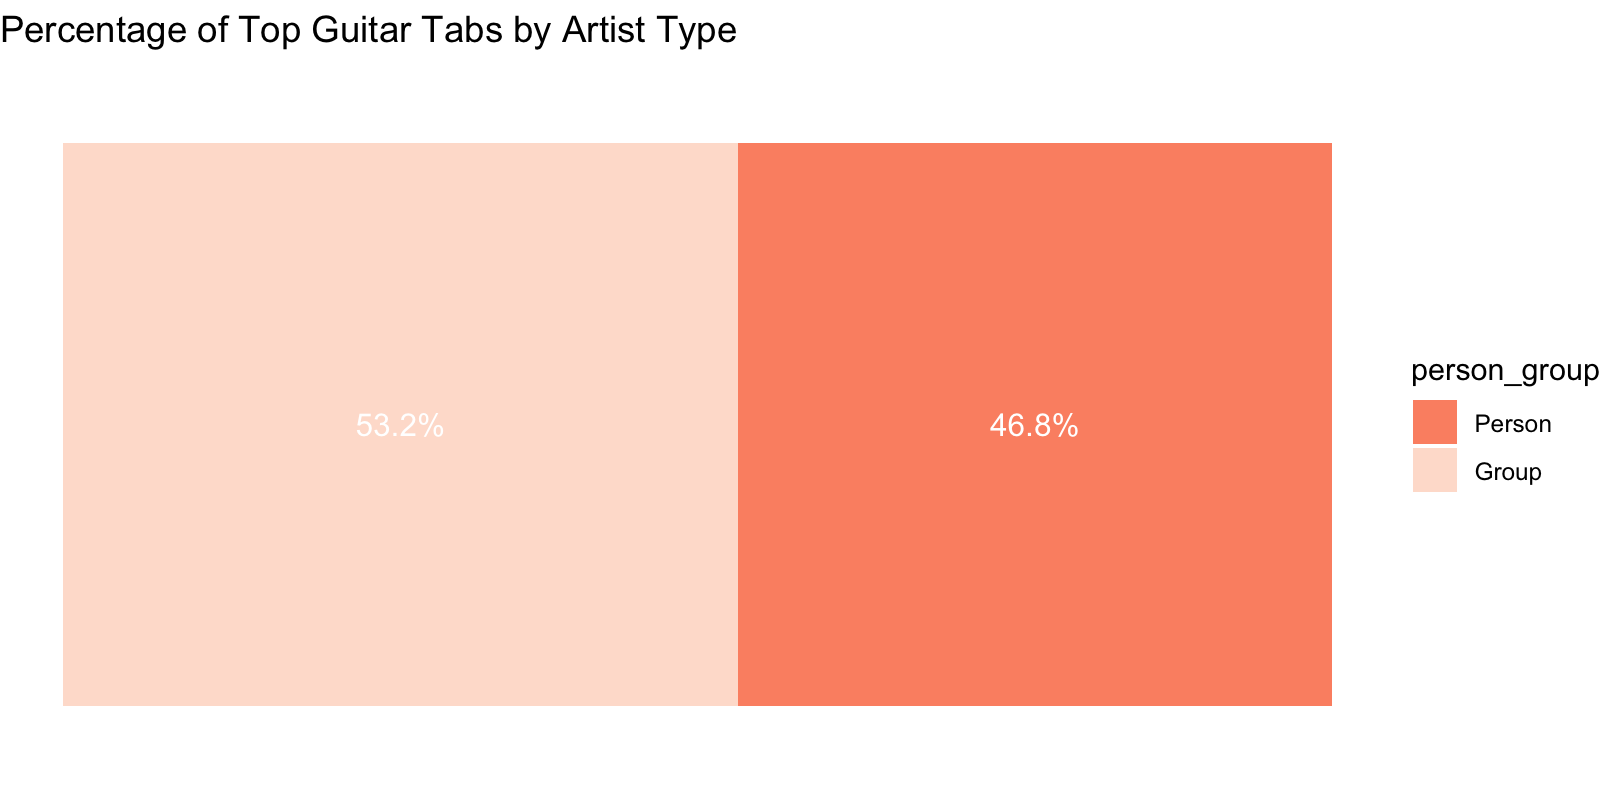

In [119]:
%%R -i df -w 8 -h 4 --units in -r 200
df %>% 
  filter(person_group %in% c('Person', 'Group')) %>%
  group_by(person_group) %>% 
  summarize(count = n()) %>% 
  arrange(desc(count))%>%
  mutate(percentage = count / sum(count) * 100,
            person_group = reorder(person_group, count)) %>% 
  ggplot(aes(x = "gender", y = count, fill = person_group)) + 
  ggtitle("Percentage of Top Guitar Tabs by Artist Type") +
  geom_bar(stat = "identity", position = "stack") + 
  geom_text(    aes(label = ifelse(percentage > 5, scales::percent(percentage / 100), "")),  # Show labels only if > 5%
            position = position_stack(vjust = 0.5),
            size = 4,
            color = "white") + 
  scale_fill_brewer(palette = "Reds", direction = -1) +  # Use a softer palette
  coord_flip() +
  theme_void()

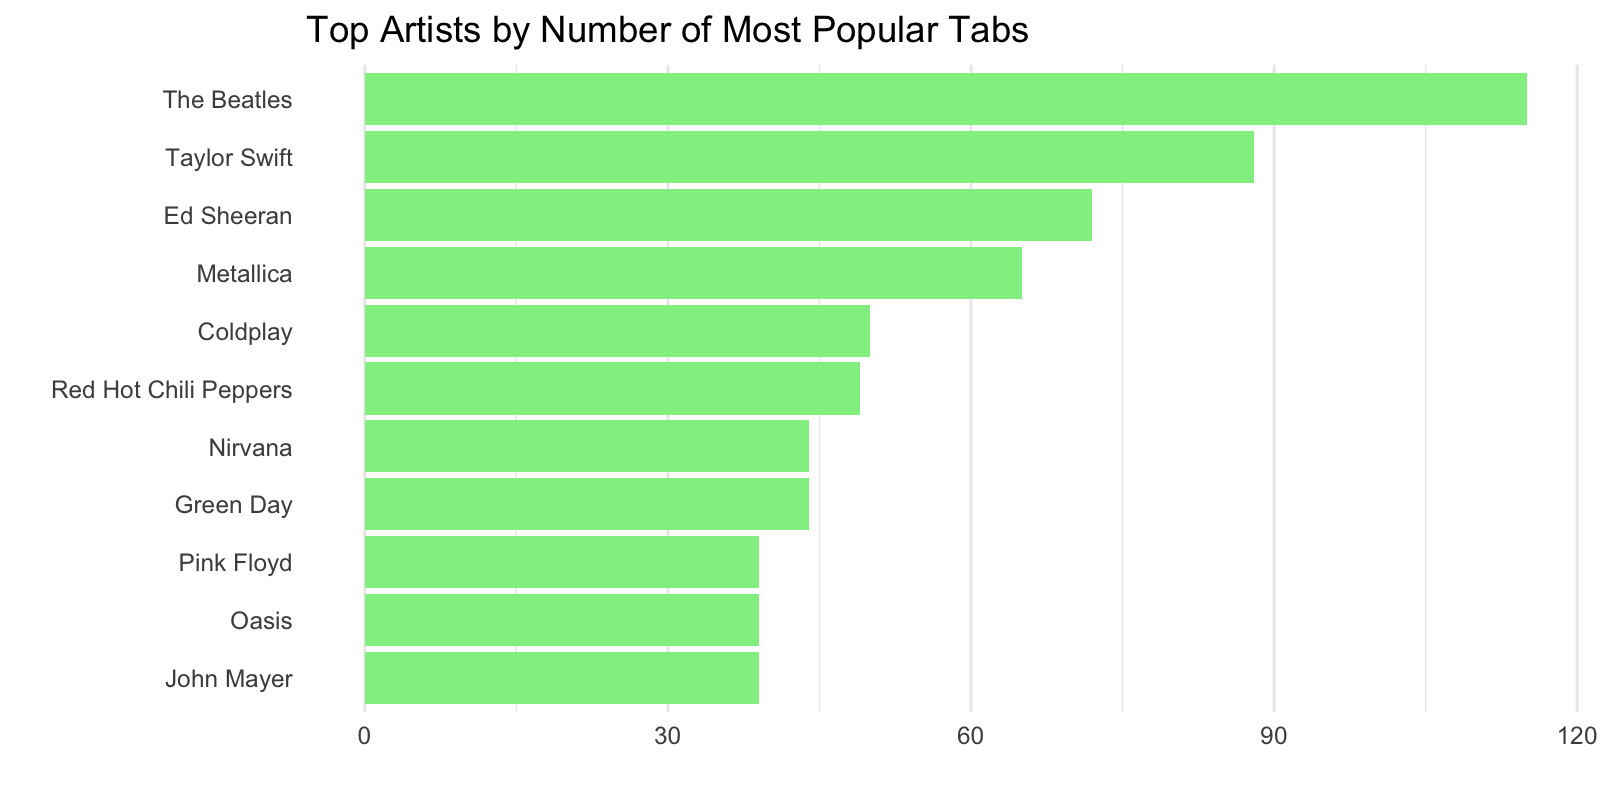

In [142]:
%%R -i df -w 8 -h 4 --units in -r 200
df %>% 
  group_by(artist) %>% 
  summarize(count = n()) %>% 
  slice_max(order_by=count, n=10) %>% 
  ggplot(aes(x = reorder(artist, count), y = count)) + 
  ggtitle("Top Artists by Number of Most Popular Tabs") +
  geom_bar(stat = "identity", fill = "lightgreen") +
  scale_fill_brewer("Greens") +
  xlab("") +
  ylab("")+
  coord_flip() +
  theme_minimal() +
  theme( panel.grid.major.y= element_blank())